p1

At rank 1, Aapprox min: 0.010631669658746637, max: 1.0
At rank 2, Aapprox min: 0.016667855100532585, max: 1.0
At rank 4, Aapprox min: 0.0, max: 1.0
At rank 8, Aapprox min: 0.0, max: 1.0
At rank 16, Aapprox min: 0.0, max: 1.0
At rank 32, Aapprox min: 0.0, max: 1.0
At rank 64, Aapprox min: 0.0, max: 1.0
At rank 128, Aapprox min: 0.0, max: 1.0
At rank 256, Aapprox min: 0.0, max: 1.0


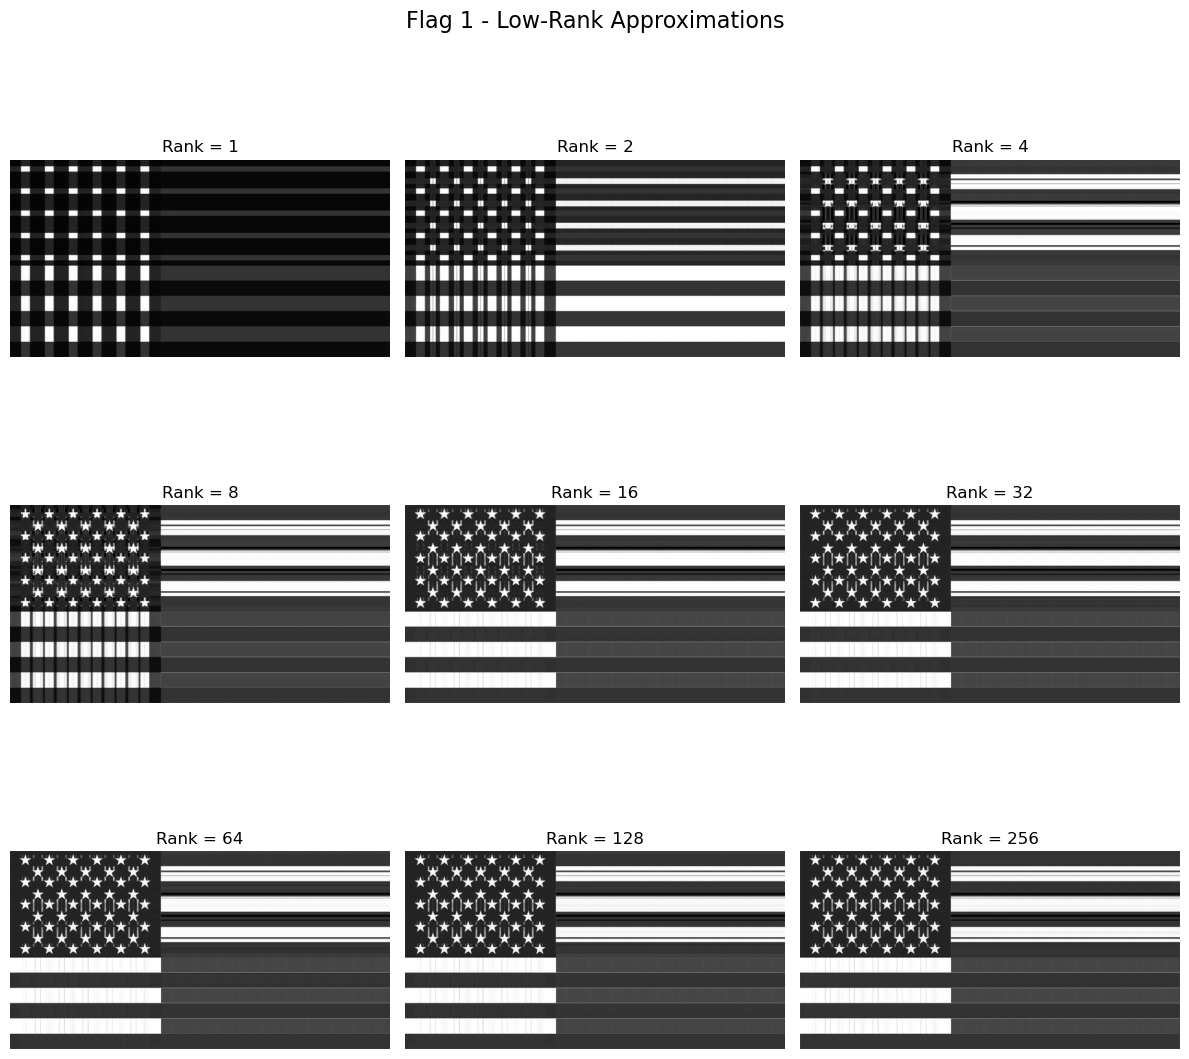

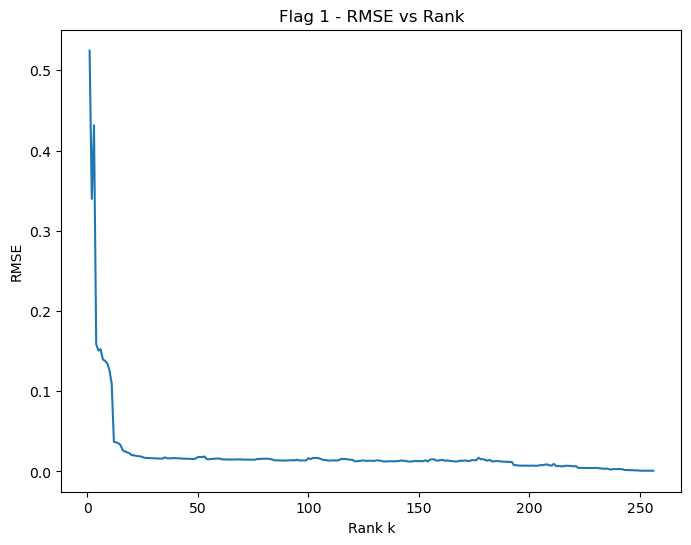

At rank 1, Aapprox min: 0.014447865476355248, max: 1.0
At rank 2, Aapprox min: 0.0, max: 1.0
At rank 4, Aapprox min: 0.0, max: 1.0
At rank 8, Aapprox min: 0.0, max: 1.0
At rank 16, Aapprox min: 0.0, max: 1.0
At rank 32, Aapprox min: 0.0, max: 1.0
At rank 64, Aapprox min: 0.0, max: 1.0
At rank 128, Aapprox min: 0.0, max: 1.0
At rank 256, Aapprox min: 0.0, max: 1.0


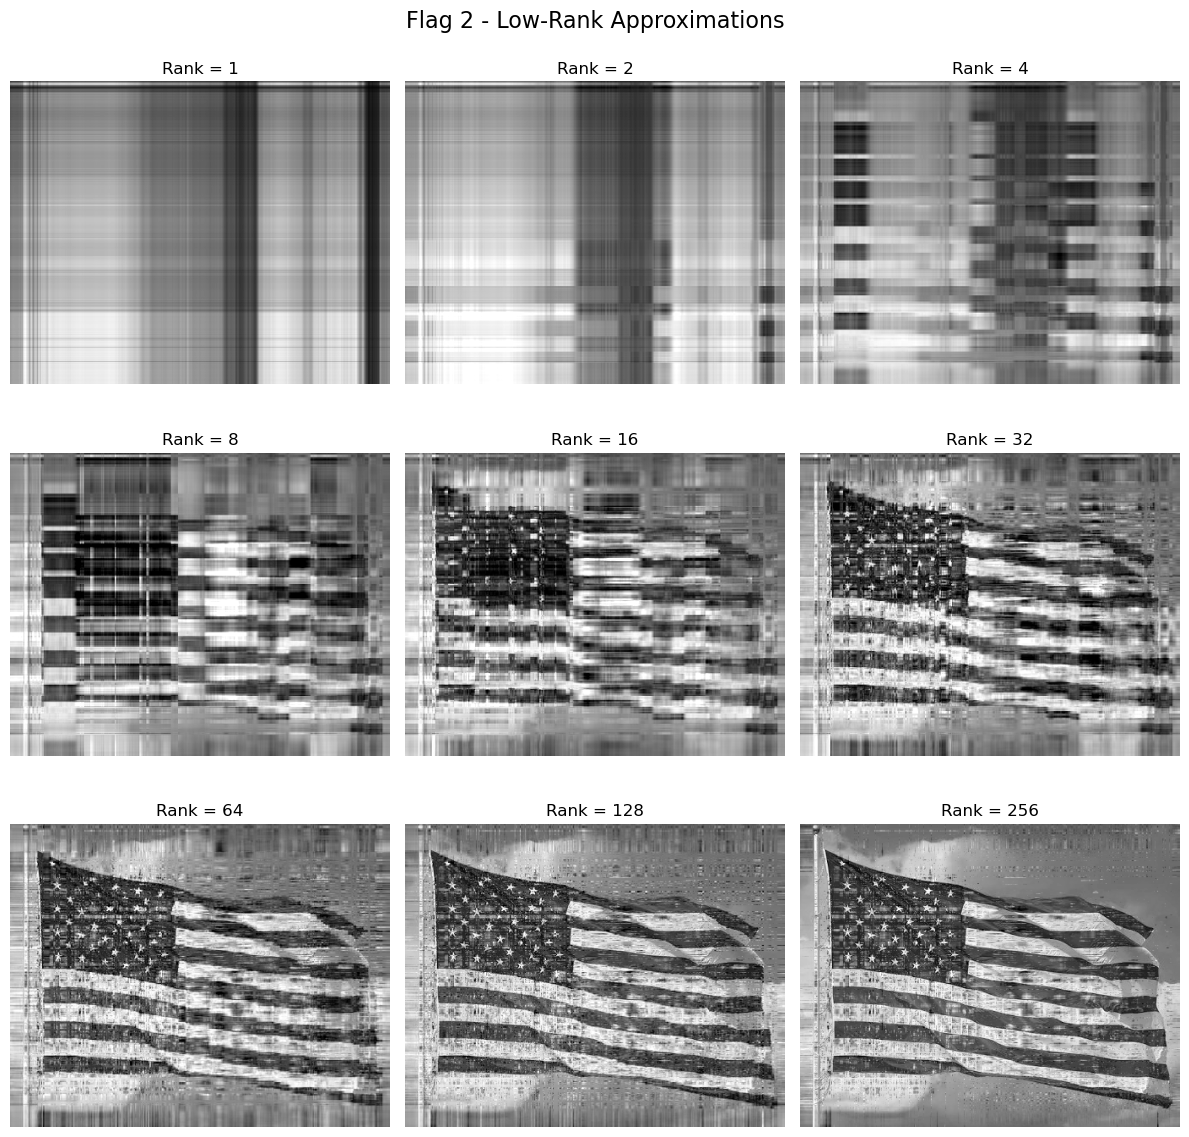

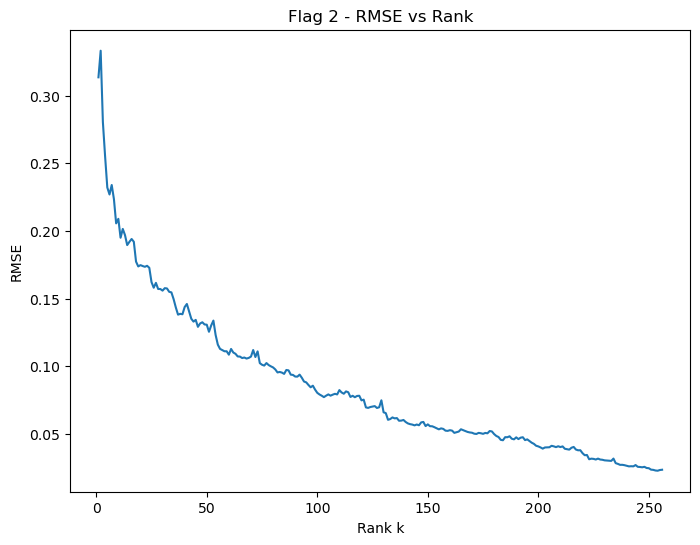

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from numpy.linalg import norm

def low_rank_approximation(image_path, max_rank, ranks_to_plot, title_prefix):
    # Load image and convert to grayscale
    A = io.imread(image_path)
    A = color.rgb2gray(A)
    # Convert image to float and normalize to [0, 1] if necessary
    if A.dtype == np.uint8:
        A = A.astype(float) / 255.0
    else:
        A = A.astype(float)

    # Initialize variables
    Aapprox = np.zeros_like(A)
    sq = np.sqrt(A.size)
    errors = []

    # Prepare to store images at specified ranks
    approx_images = {}

    # Copy of A for iterative approximation
    A_error = A.copy()

    for k in range(1, max_rank + 1):
        # Find indices of the maximum absolute error
        max_abs_err = np.max(np.abs(A_error))
        i, j = np.unravel_index(np.argmax(np.abs(A_error), axis=None), A_error.shape)
        pivot = A_error[i, j]

        # Check if there's any error left to reduce
        if pivot == 0:
            break  # No more error to reduce

        # Construct the rank-1 matrix to reduce the maximum error
        Ak = np.outer(A_error[:, j], A_error[i, :] / pivot)

        # Update the approximation and residual error
        Aapprox += Ak
        A_error -= Ak

        # Clip Aapprox to maintain pixel value range
        Aapprox = np.clip(Aapprox, 0, 1)
        A_error = np.clip(A_error, -1, 1)  # Ensuring A_error stays within reasonable bounds

        # Compute and store the RMSE
        err = norm(A_error, 'fro') / sq
        errors.append(err)

        # Save the approximation at specified ranks
        if k in ranks_to_plot:
            approx_images[k] = Aapprox.copy()
            print(f"At rank {k}, Aapprox min: {Aapprox.min()}, max: {Aapprox.max()}")

    # Plot the images at specified ranks
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for idx, k in enumerate(ranks_to_plot):
        ax = axes.flatten()[idx]
        ax.imshow(approx_images[k], cmap='gray', vmin=0, vmax=1)
        ax.set_title(f'Rank = {k}')
        ax.axis('off')
    plt.suptitle(f'{title_prefix} - Low-Rank Approximations', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plot RMSE as a function of k
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(errors)+1), errors)
    plt.xlabel('Rank k')
    plt.ylabel('RMSE')
    plt.title(f'{title_prefix} - RMSE vs Rank')
    plt.show()

# Parameters
max_rank = 256
ranks_to_plot = [1, 2, 4, 8, 16, 32, 64, 128, 256]

# Run for flag1.jpg
low_rank_approximation('flag1.jpg', max_rank, ranks_to_plot, 'Flag 1')

# Run for flag2.jpg
low_rank_approximation('flag2.jpg', max_rank, ranks_to_plot, 'Flag 2')


p2

Coefficients:
b = 0.2574
c = -0.2005
d = 0.0756


/var/folders/q8/8t3lfc9d7t97bsq581_lr9780000gn/T/ipykernel_4486/2860856257.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=[1], colors='b', linewidths=2, label='Fitting Ellipse')


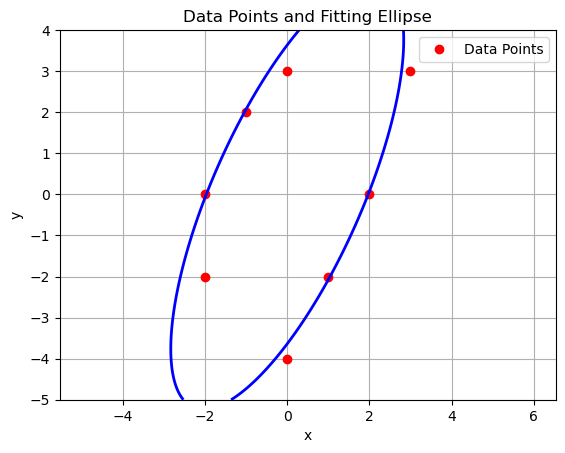

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ellipse(x, y):
    # Number of data points
    m = len(x)
    
    # Construct matrix A
    A = np.column_stack((x**2, x * y, y**2))
    
    # Construct right-hand side vector s
    s = np.ones(m)
    
    # Solve the least-squares problem
    coeffs, residuals, rank, s_vals = np.linalg.lstsq(A, s, rcond=None)
    
    # Extract coefficients
    b, c, d = coeffs
    return b, c, d

# Define the data points
x = np.array([3, 1, 0, -1, -2, 0, -2, 2])
y = np.array([3, -2, 3, 2, -2, -4, 0, 0])

# Call the ellipse function
b, c, d = ellipse(x, y)

# Print the coefficients
print('Coefficients:')
print(f'b = {b:.4f}')
print(f'c = {c:.4f}')
print(f'd = {d:.4f}')

# Plot the data points
plt.figure()
plt.plot(x, y, 'ro', label='Data Points')

# Define the range for x and y
x_range = np.linspace(min(x) - 1, max(x) + 1, 400)
y_range = np.linspace(min(y) - 1, max(y) + 1, 400)
X, Y = np.meshgrid(x_range, y_range)

# Compute the ellipse equation values
Z = b * X**2 + c * X * Y + d * Y**2

# Plot the contour where Z equals 1
plt.contour(X, Y, Z, levels=[1], colors='b', linewidths=2, label='Fitting Ellipse')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and Fitting Ellipse')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


p3

In [2]:
import numpy as np

def construct_A(theta, n):
    m = len(theta)
    A = np.ones((m, 1))  # phi_0
    for k in range(1, n + 1):
        cos_k_theta = np.cos(k * theta).reshape(-1, 1)
        sin_k_theta = np.sin(k * theta).reshape(-1, 1)
        A = np.hstack((A, cos_k_theta, sin_k_theta))
    return A

def compute_f(x, y):
    f = np.sqrt((x - 1.1)**2 + y**2)
    return f

def solve_least_squares(A, f):
    c, residuals, rank, s = np.linalg.lstsq(A, f, rcond=None)
    return c

def evaluate_u(c, x, y):
    r = np.sqrt(x**2 + y**2)
    theta_point = np.arctan2(y, x)
    u = c[0]  # Start with c0 * phi0

    n_terms = (len(c) - 1) // 2
    for k in range(1, n_terms + 1):
        idx_cos = 2 * k - 1
        idx_sin = 2 * k
        u += c[idx_cos] * (r**k) * np.cos(k * theta_point)
        u += c[idx_sin] * (r**k) * np.sin(k * theta_point)
    return u

# Discretize the boundary
m = 1000
theta = np.linspace(0, 2 * np.pi, m, endpoint=False)
x_boundary = np.cos(theta)
y_boundary = np.sin(theta)

# Compute boundary data
f_boundary = compute_f(x_boundary, y_boundary)

# Points to evaluate
x_point = 0.8
y_point = 0.2

# Loop over n values
n_values = range(0, 21, 2)
u_values = []

print("n\t u(0.8, 0.2)")
for n in n_values:
    A = construct_A(theta, n)
    c = solve_least_squares(A, f_boundary)
    u = evaluate_u(c, x_point, y_point)
    u_values.append(u)
    print(f"{n}\t {u:.6f}")


n	 u(0.8, 0.2)
1	 0.637781
2	 0.535095
4	 0.496083
8	 0.493664
16	 0.495663
32	 0.495669
64	 0.495669
128	 0.495669
256	 0.495669
512	 0.495669
1024	 0.389033
2048	 0.278182
4096	 0.174440
8192	 0.099372
16384	 0.053319
32768	 0.027659
65536	 0.013879
